In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
var_1=pd.read_csv("C:\\Users\\asus\\Downloads\\Fitness Classes Data\\path_to_cleaned_file_KashishSharma.csv")

In [3]:
var_1.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR),DayOfWeek,Hour,ActivitySiteID_Num
0,BRP,20:20:20 9.30-10.30am,2018-06-01,09:30:00,0.485294,0.529412,499,4,9,0
1,BRP,20:20:20 9.30-10.30am,2018-06-08,09:30:00,0.485294,0.666667,499,4,9,0
2,BRP,20:20:20 9.30-10.30am,2018-06-15,09:30:00,0.485294,0.588235,499,4,9,0
3,BRP,20:20:20 9.30-10.30am,2018-06-22,09:30:00,0.485294,0.607843,499,4,9,0
4,BRP,20:20:20 9.30-10.30am,2018-06-29,09:30:00,0.485294,0.352941,499,4,9,0


#MSE measures the average squared difference between the predicted and actual values. A lower MSE indicates a better fit.
#R-squared represents the proportion of variance in the dependent variable that is predictable from the independent variable(s).
#So, the r-squared is low, indicating that the model does not explain much of the variability in the total bookees data based on price changes.
#Quantile - Quantile plot is a geographical tol that can helps us to determine if a datset follows a certain probability distribution of if two datsets come from the same distribution.
#The Q-Q plot for the SVM model shows that the residuals deviate from the expected normal distribution, especially in the tails, indicating that the SVM model may not be capturing the underlying data distribution very well.

In [4]:
var_1['Total Bookees'] = var_1['Number Booked'] * var_1['MaxBookees']
var_1['LogPrice'] = np.log(var_1['Price (INR)'])
var_1['LogAttendance'] = np.log(var_1['Total Bookees'] + 1)

In [5]:
X = var_1[['LogPrice']]
y = var_1['LogAttendance']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Mean Squared Error: 0.011166226766644352
Random Forest R-squared: 0.03344236104483789


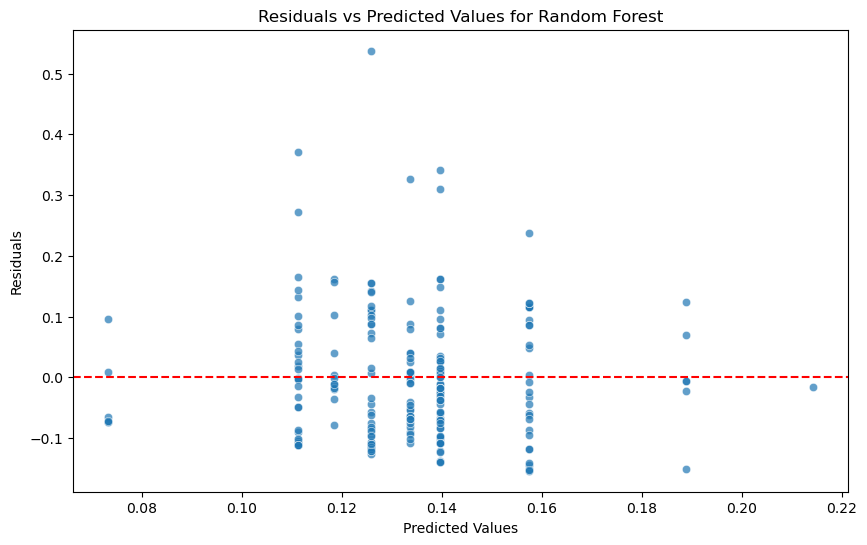

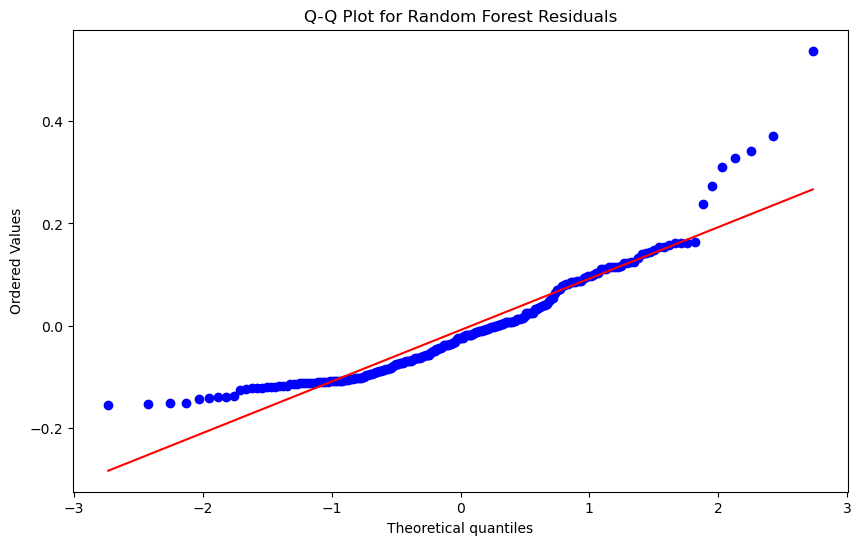

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')
import matplotlib.pyplot as plt
import seaborn as sns

# Residual plot
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values for Random Forest')
plt.show()

# Q-Q plot for residuals
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals_rf, dist="norm", plot=plt)
plt.title('Q-Q Plot for Random Forest Residuals')
plt.show()

SVM Mean Squared Error: 0.011322277311700414
SVM R-squared: 0.019934499388506777


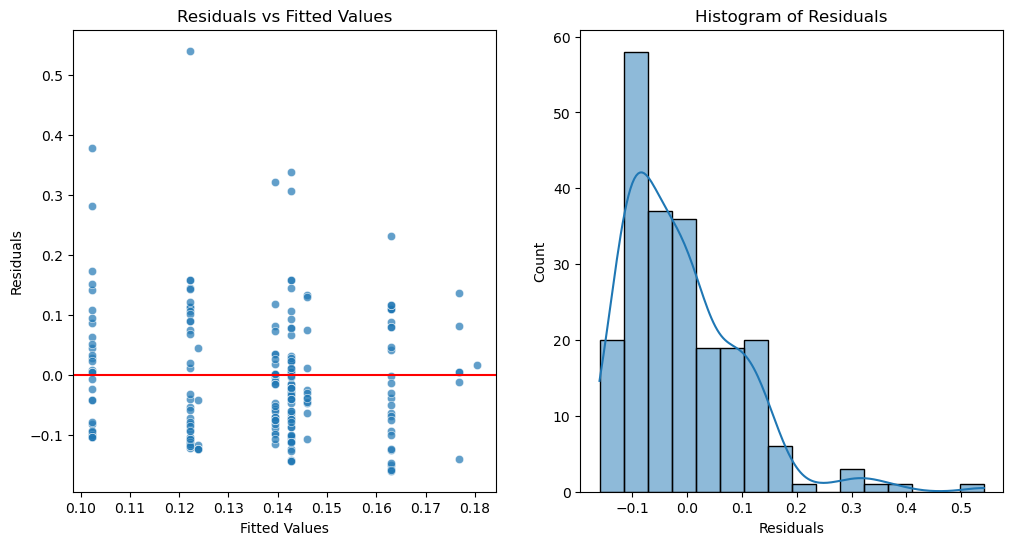

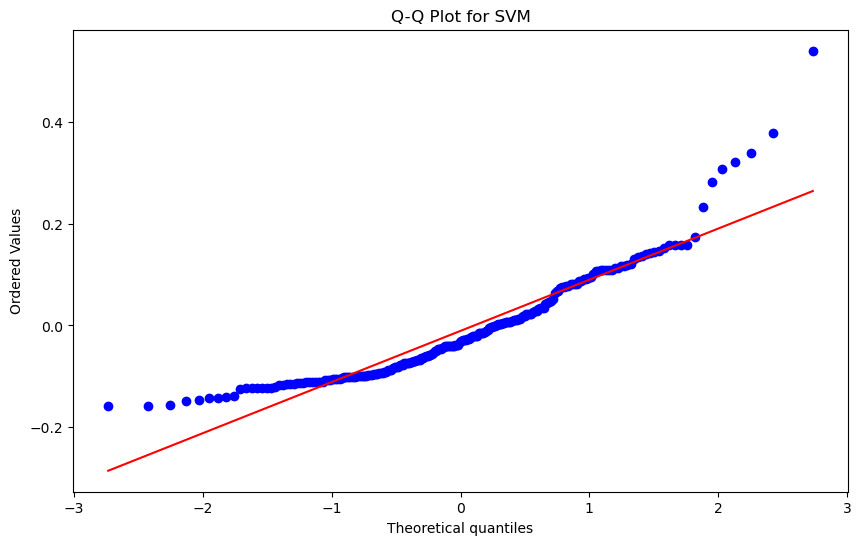

In [8]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load data (assuming data is already loaded into X_train, X_test, y_train, y_test)

# Fit the SVM model
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_model.fit(X_train, y_train)

# Predict using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Calculate the residuals
residuals_svm = y_test - y_pred_svm

# Evaluate the SVM model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f'SVM Mean Squared Error: {mse_svm}')
print(f'SVM R-squared: {r2_svm}')

# Residuals vs Fitted Values
plt.figure(figsize=(12, 6))

# Plot residuals vs predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_svm, y=residuals_svm, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='-')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals_svm, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

# Q-Q plot for residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals_svm, dist="norm", plot=plt)
plt.title('Q-Q Plot for SVM')
plt.show()